In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [103]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
bank_marketing = fetch_ucirepo(id=222) 

In [3]:
df1 = pd.read_csv('data/bank.csv',sep=';')

In [4]:
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [6]:
df1.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
unique_values = df1['age'].unique()
print(unique_values)

[30 33 35 59 36 39 41 43 20 31 40 56 37 25 38 42 44 26 55 67 53 68 32 49
 78 23 52 34 61 45 48 57 54 63 51 29 50 27 60 28 21 58 22 46 24 77 75 47
 70 65 64 62 66 19 81 83 80 71 72 69 79 73 86 74 76 87 84]


In [8]:
len(unique_values)

67

In [9]:
df1['marital'].value_counts()

marital
married     2797
single      1196
divorced     528
Name: count, dtype: int64

In [10]:
df1['job'].value_counts()

job
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: count, dtype: int64

In [11]:
df1['education'].value_counts()

education
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: count, dtype: int64

In [12]:
df1p = pd.DataFrame(df1)

In [13]:
#countplot 쓰려면 데이터프레임 형식으로 바꿔야함. 

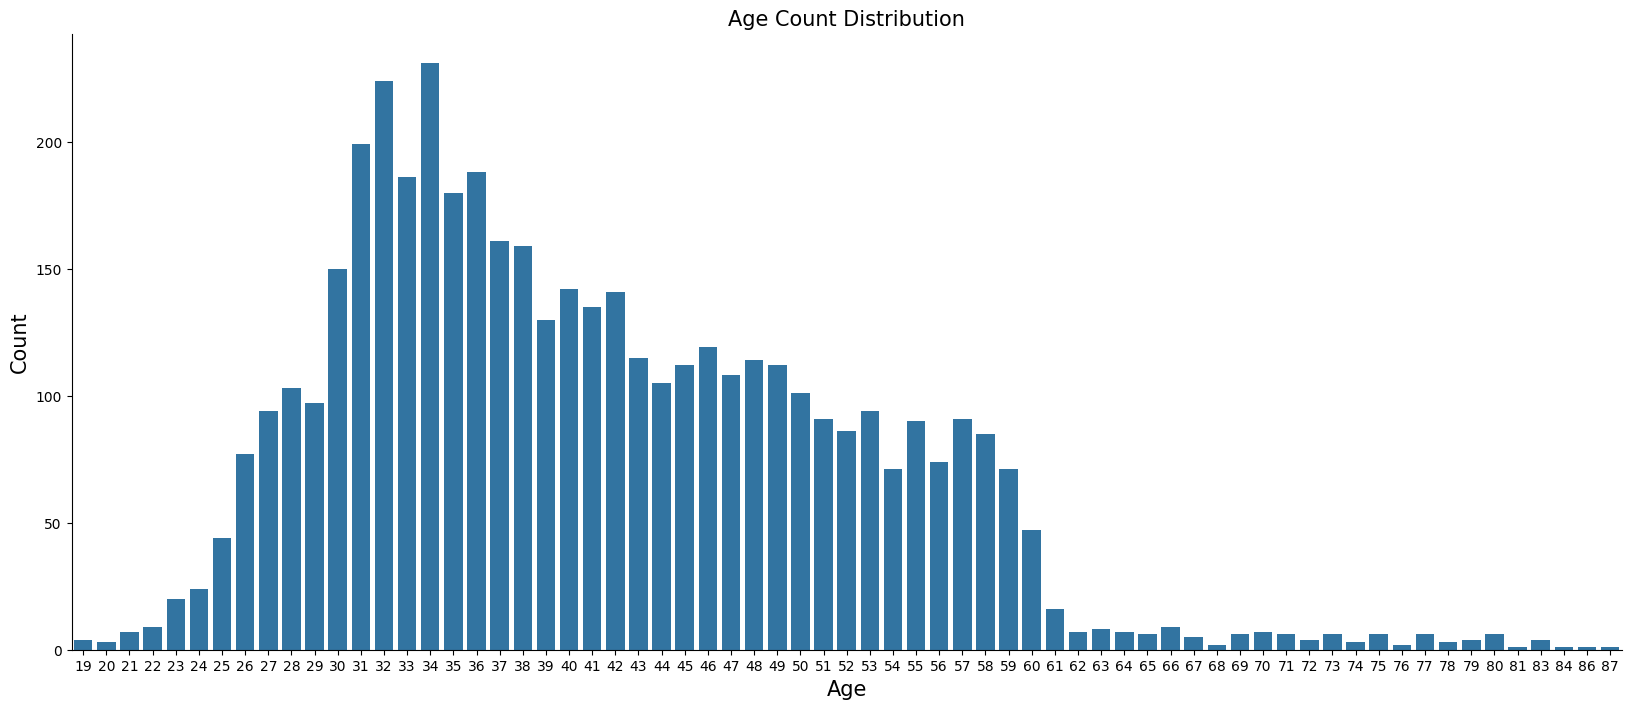

In [14]:
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data =  df1p)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()

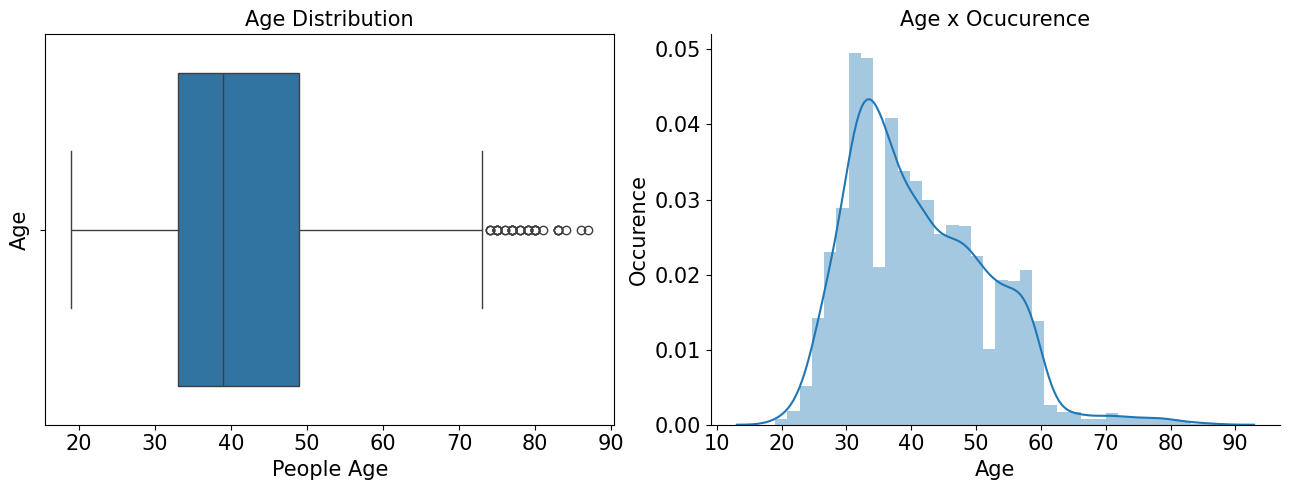

In [15]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'age', data = df1p, orient = 'v', ax = ax1)
ax1.set_xlabel('People Age', fontsize=15)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Age Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(df1['age'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Age x Ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

In [16]:
df1[['pdays', 'campaign', 'previous']].describe()

,pdays,campaign,previous
count,4521.000000,4521.000000,4521.000000
mean,39.766645,2.793630,0.542579
std,100.121124,3.109807,1.693562
min,-1.000000,1.000000,0.000000
25%,-1.000000,1.000000,0.000000
50%,-1.000000,2.000000,0.000000
75%,-1.000000,3.000000,0.000000
max,871.000000,50.000000,25.000000


In [17]:
quantile_95 = df1['pdays'].quantile(0.95)
print(quantile_95)

317.0


In [18]:
campaign_95 = df1['campaign'].quantile(0.95)
print(campaign_95)

8.0


In [19]:

previous_95 = df1['previous'].quantile(0.95)
print(previous_95)

3.0


In [20]:
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

<Axes: title={'center': 'Job and deposit'}, xlabel='job'>

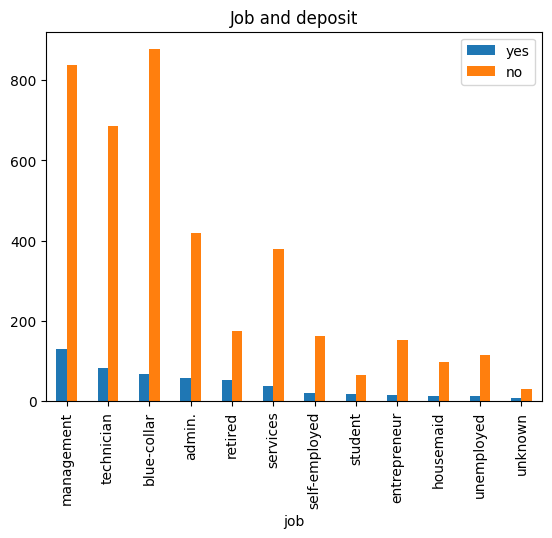

In [21]:
j_df1 = pd.DataFrame()

j_df1['yes'] = df1[df1['y'] == 'yes']['job'].value_counts()
j_df1['no'] = df1[df1['y'] == 'no']['job'].value_counts()

j_df1.plot.bar(title = 'Job and deposit')

In [22]:
bool_columns = ['default', 'housing', 'loan', 'deposit']

df1.loc[df1['default'] == 'yes', 'default'] = 1
df1.loc[df1['default'] == 'no', 'default'] = 0
df1.loc[df1['housing'] == 'yes', 'housing'] = 1
df1.loc[df1['housing'] == 'no', 'housing'] = 0
df1.loc[df1['loan'] == 'yes', 'loan'] = 1
df1.loc[df1['loan'] == 'no', 'loan'] = 0

In [23]:
cat = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']

In [24]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# 데이터 프레임 생성
df1cat = pd.DataFrame(df1[['job', 'marital', 'education', 'contact', 'month', 'poutcome']])

In [25]:
#더미로 바뀐거 넣을 곳 
encoder = LabelEncoder()

# one hit encoding 
encoded_data = df1cat.apply(encoder.fit_transform)

encoded_data

,job,marital,education,contact,month,poutcome
0,10,1,0,0,10,3
1,7,1,1,0,8,0
2,4,2,2,0,0,0
3,4,1,2,2,6,3
4,1,1,1,2,8,3
...,...,...,...,...,...,...
4516,7,1,1,0,5,3
4517,6,1,2,2,8,3
4518,9,1,1,0,1,3
4519,1,1,1,0,3,1


In [26]:
df1_encoded = pd.concat([df1.drop(columns=df1cat.columns), encoded_data], axis=1)
df1_encoded.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,job,marital,education,contact,month,poutcome
0,30,0,1787,0,0,19,79,1,-1,0,no,10,1,0,0,10,3
1,33,0,4789,1,1,11,220,1,339,4,no,7,1,1,0,8,0
2,35,0,1350,1,0,16,185,1,330,1,no,4,2,2,0,0,0
3,30,0,1476,1,1,3,199,4,-1,0,no,4,1,2,2,6,3
4,59,0,0,1,0,5,226,1,-1,0,no,1,1,1,2,8,3


In [30]:
train_data = df1_encoded.drop(columns = 'y')
test_data = df1_encoded[['y']]

In [31]:
TEST_SIZE = 0.3
RAND_STATE = 42

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 

In [33]:
from sklearn.model_selection import train_test_split
train_test_split(train_data, test_data) 

[      age default  balance housing loan  day  duration  campaign  pdays  \
 1417   40       1        0       1    0    6        64         2     -1   
 4172   36       0      760       0    0   20         9        13     -1   
 2239   42       0        0       1    0   21       328         6     -1   
 1885   36       0       60       0    0   19       209         2     -1   
 3084   45       0     4646       1    0   13       118         1     -1   
 ...   ...     ...      ...     ...  ...  ...       ...       ...    ...   
 738    36       0     1855       1    0    4        75         1    273   
 3445   48       0      427       0    0   14       201         1     -1   
 1352   23       0     1021       0    0   19        79         9     -1   
 60     41       0     -516       0    1    8       554         3     -1   
 3715   51       0     2967       0    0   17        83         2     -1   
 
       previous  job  marital  education  contact  month  poutcome  
 1417         0  